# NLP Lab Task — Preprocessing to Deployment with Twitter Sentiment Dataset

## Overview

This lab takes students through the **entire NLP pipeline** using a **Twitter Sentiment Analysis dataset** (tweets labeled as positive, negative, or neutral). Students will preprocess the data, represent it using multiple methods, train classical machine learning models, evaluate their results, and finally build a small API for deployment.

---

## Learning Objectives

* Apply text preprocessing (regex, case folding, tokenization, stopword removal, punctuation handling).
* Compare stemming and lemmatization, and use POS tagging to analyze counts of nouns, verbs, and adjectives.
* Build text representations using **Bag-of-Words**, **TF–IDF**, and **Word2Vec**.
* Train classical ML models inside an sklearn **Pipeline**.
* Evaluate models with standard metrics and perform basic error analysis.
* Save a trained pipeline and build a simple API to serve predictions.

---

## Dataset

We will use the **Sentiment140 Twitter dataset** (1.6M tweets, labeled positive/negative). For simplicity, you can work with a smaller balanced subset (e.g., 10k–20k tweets). This dataset is widely used for sentiment analysis and contains real, noisy text with mentions, hashtags, and emoticons.

Dataset link: [Sentiment140](http://help.sentiment140.com/for-students/)

---

## Step-by-Step Tasks

### 1) Exploratory Data Analysis (EDA)

* Load dataset, show class distribution, tweet length histogram, and a few sample tweets.
* Deliverable: 3 plots (class balance, length histogram, top frequent tokens) + 5 example tweets.

### 2) Regex Cleaning

* Remove URLs, mentions (@user), hashtags, emojis (or replace with tokens), and extra whitespace.
* Show a before-and-after example for at least 3 tweets.

### 3) Case Folding & Tokenization

* Convert all text to lowercase.
* Tokenize tweets using NLTK or spaCy.
* Compare vocabulary size before and after cleaning.

### 4) Stopwords, Punctuation, and Numbers

* Remove stopwords (with NLTK list, customizable).
* Decide how to handle punctuation and numbers (remove or replace with `<NUM>`).
* Deliverable: short explanation of your choice.

### 5) Stemming vs Lemmatization

* Use PorterStemmer (stemming) and spaCy lemmatizer.
* Show 20 sample words with their stem vs lemma.
* Train quick models with both and compare results.

### 6) POS Tagging (extra features)

* Use spaCy to count nouns, verbs, and adjectives per tweet.
* Add these counts as additional numeric features.
* Compare model with vs without POS features.

### 7) Text Representation

* Implement three representations:
  1. **Bag-of-Words** (CountVectorizer)
  2. **TF–IDF** (TfidfVectorizer)
  3. **Word2Vec** (pretrained embeddings, averaged per tweet)
* Compare vocabulary sizes and representation dimensions.

### 8) Modeling with Pipelines

* Use sklearn Pipelines to connect preprocessing + vectorizer + classifier.
* Models to try:
  * Multinomial Naive Bayes (for BoW/TF–IDF)
  * Logistic Regression
  * Linear SVM
* Deliverable: comparison table (accuracy, F1-score).

### 9) Evaluation & Error Analysis

* Use held-out test set.
* Metrics: accuracy, precision, recall, F1, confusion matrix.
* Show 10 misclassified tweets and discuss why they may be difficult.

### 10) Save Model Pipeline

* Save the best pipeline using `joblib` or `pickle`.
* Deliverable: `sentiment_model.pkl` file.

### 11) Build a Simple API (Deployment Step)

* Create a small Flask API with one endpoint `/predict` that accepts a tweet as input and returns sentiment prediction.
* The API should load the saved pipeline and make predictions.
* Deliverable: `app.py` with Flask code + test with a sample curl or Postman request.

---

## Deliverables

1. Jupyter Notebook with step-by-step tasks, results, and code.
2. Comparison tables for preprocessing choices and representations.
3. Saved pipeline file (`.pkl`).
4. Flask API script (`app.py`).
5. Short report in markdown cell summarizing preprocessing, modeling choices, and results.

---

This streamlined lab ensures students get hands-on experience with **real-world text preprocessing, classical modeling, and deployment of NLP systems**.


Step 1: Exploratory Data Analysis (EDA)

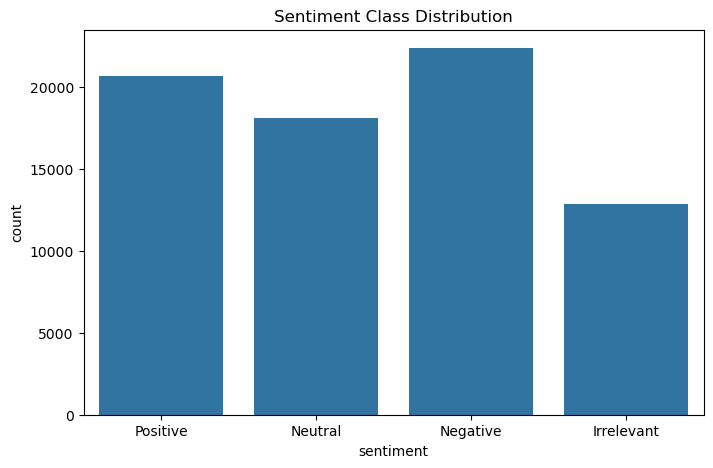

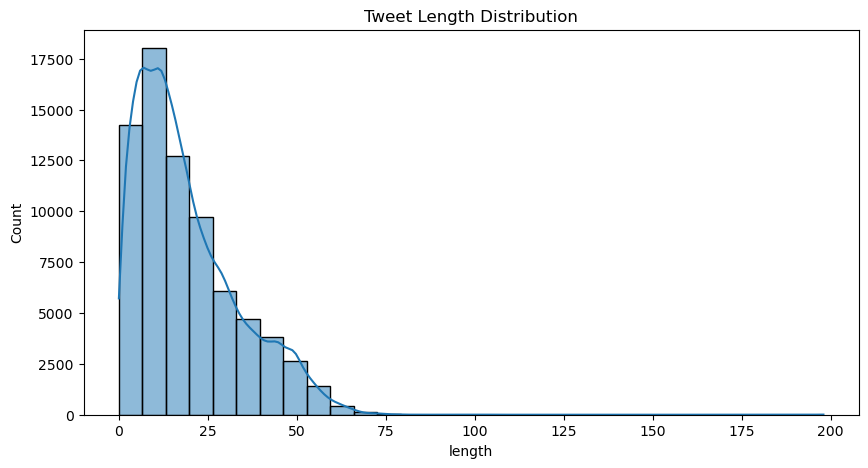

Example Tweets:
      sentiment                                               text
3566   Positive  I made a crazy Cod Black Ops Cold War montage....
18286   Neutral  I said I wouldn ’ t get a ps5 but fucking hell...
53063  Positive                                                  I
39354  Positive  4x Nozdormu the Timeless! :] Sadly, it was jus...
17275   Neutral                                           LMAO WTF


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset (No headers in the file, so we assign names)
columns = ['id', 'entity', 'sentiment', 'text']
df = pd.read_csv('twitter_training.csv', header=None, names=columns)

# Drop missing values
df = df.dropna(subset=['text'])

# 1. Class Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='sentiment', data=df)
plt.title('Sentiment Class Distribution')
plt.show()

# 2. Tweet Length Histogram
df['length'] = df['text'].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(10, 5))
sns.histplot(df['length'], bins=30, kde=True)
plt.title('Tweet Length Distribution')
plt.show()

# 3. Sample Tweets
print("Example Tweets:")
print(df[['sentiment', 'text']].sample(5))

Step 2: Regex Cleaning

In [3]:
import re

def clean_text(text):
    text = str(text).lower()                    # Case folding (Step 3 preview)
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE) # Remove URLs
    text = re.sub(r'@\w+', '', text)            # Remove mentions (@user)
    text = re.sub(r'#\w+', '', text)            # Remove hashtags
    text = re.sub(r'\d+', '<NUM>', text)        # Replace numbers (Step 4)
    text = re.sub(r'[^\w\s]', '', text)         # Remove punctuation/emojis
    text = re.sub(r'\s+', ' ', text).strip()    # Remove extra whitespace
    return text

# Apply cleaning
df['clean_text'] = df['text'].apply(clean_text)

# Show Before & After
print(df[['text', 'clean_text']].sample(3))

                                                    text  \
46080  Hey @VerizonSupport someone needs to give Shei...   
23802  When my family asks me about oscars major I ex...   
47250  Woman at Home Depot cites ‘white power’ as rea...   

                                              clean_text  
46080  hey someone needs to give sheila wish i had a ...  
23802  when my family asks me about oscars major i ex...  
47250  woman at home depot cites white power as reaso...  


Step 3 & 4: Tokenization & Stopword Removal

In [4]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def tokenize_and_remove_stopwords(text):
    tokens = word_tokenize(text)
    return [word for word in tokens if word not in stop_words]

df['tokens'] = df['clean_text'].apply(tokenize_and_remove_stopwords)

# Compare Vocabulary Size
vocab_raw = set(" ".join(df['text'].astype(str)).split())
vocab_clean = set([word for tokens in df['tokens'] for word in tokens])

print(f"Original Vocabulary Size: {len(vocab_raw)}")
print(f"Processed Vocabulary Size: {len(vocab_clean)}")

[nltk_data] Downloading package punkt to C:\Users\Yousef
[nltk_data]     Moustafa\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to C:\Users\Yousef
[nltk_data]     Moustafa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Original Vocabulary Size: 82366
Processed Vocabulary Size: 37993


Step 5: Stemming vs. Lemmatization

In [5]:
from nltk.stem import PorterStemmer, WordNetLemmatizer
nltk.download('wordnet')

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Compare on a sample list
sample_words = ["running", "cats", "better", "went", "happily", "doing", "studies", "generously", "leaves", "feet"]

print(f"{'Original':<12} {'Stem':<12} {'Lemma':<12}")
for w in sample_words:
    print(f"{w:<12} {stemmer.stem(w):<12} {lemmatizer.lemmatize(w, pos='v'):<12}")

# Apply Lemmatization to the dataframe (often better for sentiment)
df['processed_text'] = df['tokens'].apply(lambda tokens: ' '.join([lemmatizer.lemmatize(w) for w in tokens]))

[nltk_data] Downloading package wordnet to C:\Users\Yousef
[nltk_data]     Moustafa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Original     Stem         Lemma       
running      run          run         
cats         cat          cat         
better       better       better      
went         went         go          
happily      happili      happily     
doing        do           do          
studies      studi        study       
generously   gener        generously  
leaves       leav         leave       
feet         feet         feet        


Step 6: POS Tagging (Feature Engineering)

In [6]:
import spacy

# Load spacy model (make sure to run: python -m spacy download en_core_web_sm)
nlp = spacy.load("en_core_web_sm")

def get_pos_counts(text):
    doc = nlp(text)
    return {
        'noun_count': len([token for token in doc if token.pos_ == 'NOUN']),
        'verb_count': len([token for token in doc if token.pos_ == 'VERB']),
        'adj_count': len([token for token in doc if token.pos_ == 'ADJ'])
    }

# Apply to a subset (POS tagging is slow on large data)
# For the lab, you might want to run this on the training subset only
pos_counts = df['clean_text'].head(1000).apply(get_pos_counts).apply(pd.Series)
print(pos_counts.head())

   noun_count  verb_count  adj_count
0           1           2          0
1           1           2          0
2           1           2          0
3           1           2          0
4           1           2          0


Step 7, 8 & 9: Modeling Pipeline & Evaluation

Accuracy: 0.674527027027027

Classification Report:
               precision    recall  f1-score   support

  Irrelevant       0.69      0.48      0.57      2696
    Negative       0.67      0.80      0.73      4380
     Neutral       0.67      0.61      0.64      3605
    Positive       0.68      0.73      0.70      4119

    accuracy                           0.67     14800
   macro avg       0.68      0.65      0.66     14800
weighted avg       0.68      0.67      0.67     14800



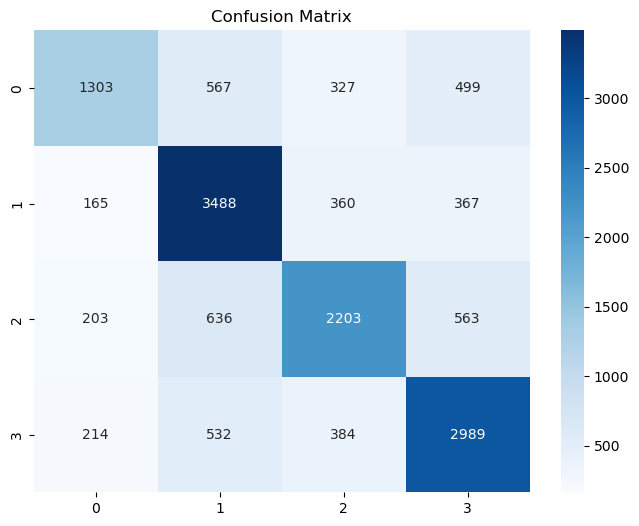

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Split Data
X = df['processed_text']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build Pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),
    ('clf', LogisticRegression(max_iter=1000))
])

# Train
pipeline.fit(X_train, y_train)

# Predict
y_pred = pipeline.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

Step 10: Save the Model

In [8]:
import joblib

# Save the pipeline
joblib.dump(pipeline, 'sentiment_model.pkl')
print("Model saved as sentiment_model.pkl")

Model saved as sentiment_model.pkl


Step 11: Deployment (Flask API)